# RFM Analysis

The iPython notebook explains how to perform <b>RFM Analysis</b> from customer purchase history data.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Read the sample orders file, containing all past purchases for all customers.

In [2]:
orders = pd.read_csv('sample-orders.csv', sep=',', engine='python')

In [3]:
orders.head()

,order_date,order_id,customer,grand_total
0,9/7/2011,CA-2011-100006,Dennis Kane,378
1,7/8/2011,CA-2011-100090,Ed Braxton,699
2,3/14/2011,CA-2011-100293,Neil Franzšsisch,91
3,1/29/2011,CA-2011-100328,Jasper Cacioppo,4
4,4/8/2011,CA-2011-100363,Jim Mitchum,21


In [4]:
orders.columns

Index(['order_date', 'order_id', 'customer', 'grand_total'], dtype='object')

In [5]:
orders.tail()

,order_date,order_id,customer,grand_total
5004,11/4/2014,US-2014-168802,Jack O'Briant,18
5005,7/24/2014,US-2014-169320,Lena Hernandez,171
5006,9/8/2014,US-2014-169488,Allen Armold,57
5007,8/29/2014,US-2014-169502,Matthew Grinstein,113
5008,7/8/2014,US-2014-169551,Rob Lucas,1345


In [8]:
orders.index

RangeIndex(start=0, stop=5009, step=1)

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 4 columns):
order_date     5009 non-null object
order_id       5009 non-null object
customer       5009 non-null object
grand_total    5009 non-null int64
dtypes: int64(1), object(3)
memory usage: 156.6+ KB


In [13]:
orders.describe()

,grand_total
count,5009.000000
mean,458.626672
std,954.729307
min,1.000000
25%,38.000000
50%,152.000000
75%,512.000000
max,23661.000000


Top 10 frequently comming customer names

In [22]:
orders.customer.value_counts().head(10)

Emily Phan             17
Joel Eaton             13
Chloris Kastensmidt    13
Patrick Gardner        13
Zuschuss Carroll       13
Sally Hughsby          13
Erin Ashbrook          13
Noel Staavos           13
Bill Donatelli         12
Resi Pšlking           12
Name: customer, dtype: int64

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

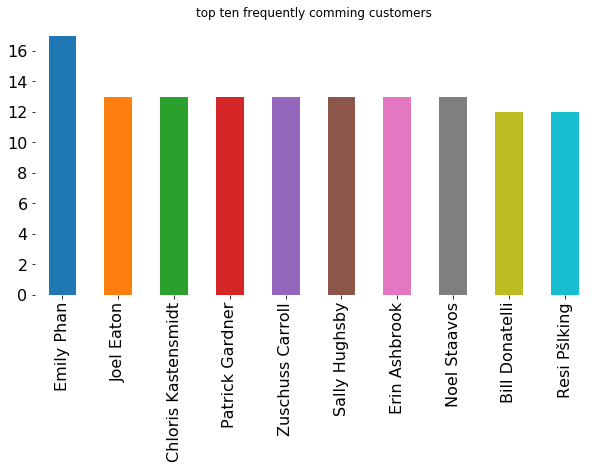

In [25]:
orders['customer'].value_counts().head(10).plot.bar(figsize=(10,5), fontsize=16, title='top ten frequently comming customers')
sns.despine(bottom=True, left=True)                                         

In [ ]:
Dates = pd.to_datetime(orders['order_date'])

Top ten dates on which most orders are placed

In [35]:
Dates.value_counts().head(10)

2013-09-06    19
2014-11-04    16
2014-09-05    16
2014-12-03    16
2014-09-08    15
2014-11-20    15
2014-12-10    15
2014-11-25    15
2014-11-14    14
2014-12-02    14
Name: order_date, dtype: int64

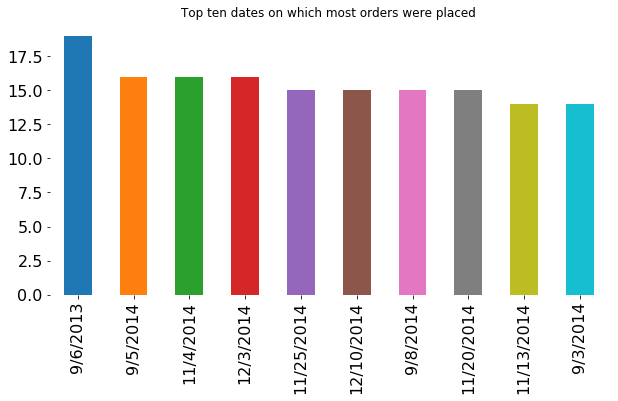

In [37]:
orders['order_date'].value_counts().head(10).plot.bar(figsize=(10,5), fontsize=16, title='Top ten dates on which most orders were placed')
sns.despine(bottom=True, left=True)

Find out the most recent date in the dataset's ```order_date``` column.

In [38]:
Dates.max()

Timestamp('2014-12-31 00:00:00')

## Create the RFM Table

Since recency is calculated for a point in time and the dataset last order date is Dec 31 2014, that is the date we will use to calculate recency

Set this date to current day and extract all orders until yesterday.

In [43]:
import datetime as dt
Now = dt.datetime(2014,12,31)
Now

datetime.datetime(2014, 12, 31, 0, 0)

In [44]:
orders['order_date'] = Dates

Create the RFM Table

In [47]:
rfmTable = orders.groupby('customer').agg({'order_date': lambda x: (Now - x.max()).days, # Recency
                                        'order_id': lambda x: len(x),      # Frequency
                                        'grand_total': lambda x: x.sum()}) # Monetary Value

rfmTable['order_date'] = rfmTable['order_date'].astype(int)
rfmTable.rename(columns={'order_date': 'recency', 
                         'order_id': 'frequency', 
                         'grand_total': 'monetary_value'}, inplace=True)

## Validating the RFM Table

In [48]:
rfmTable.head()

,recency,frequency,monetary_value
customer,,,
Aaron Bergman,415,3,887
Aaron Hawkins,12,7,1744
Aaron Smayling,88,7,3050
Adam Bellavance,54,8,7756
Adam Hart,34,10,3249


<b>Conclusion:</b> Customer <b>Aaron Bergman</b> has

| Recency | Frequency | Monetary Value |
|:-------:|:---------:|:--------:|
| 415 days | 3 | $887 |

<b>Recency(R):</b> Time since last purchase<br/>
<b>Frequency(F):</b> Total number of purchase<br/>
<b>Monetary Value(M):</b>Total monetary value

In [50]:
aaron = orders[orders['customer']=='Aaron Bergman']
aaron

,order_date,order_id,customer,grand_total
624,2011-02-19,CA-2011-152905,Aaron Bergman,13
665,2011-03-07,CA-2011-156587,Aaron Bergman,310
2336,2013-11-11,CA-2013-140935,Aaron Bergman,564


Inserting the date of Aaron purchase and comparing it to the <b>recency</b> in the <b>rfmTable</b> we verify our RFM table is correct.

In [51]:
(Now - dt.datetime(2013,11,11)).days == 415

True

In [53]:
rfmTable['frequency'].max()

17

In [64]:
# Customer who made maximum purchases
rfmTable[rfmTable['frequency'] == 17]

,recency,frequency,monetary_value
customer,,,
Emily Phan,12,17,5479


In [65]:
emily = orders[orders['customer']=='Emily Phan']
emily

,order_date,order_id,customer,grand_total
429,2011-07-06,CA-2011-134278,Emily Phan,560
1105,2012-06-21,CA-2012-123330,Emily Phan,108
1629,2012-03-14,CA-2012-163587,Emily Phan,688
1907,2013-10-12,CA-2013-113390,Emily Phan,33
2332,2013-10-29,CA-2013-140641,Emily Phan,38
2846,2014-12-19,CA-2014-102099,Emily Phan,52
3044,2014-03-04,CA-2014-111815,Emily Phan,281
3264,2014-12-14,CA-2014-122770,Emily Phan,262
3429,2014-11-29,CA-2014-131303,Emily Phan,63
3800,2014-11-08,CA-2014-149888,Emily Phan,710


In [66]:
# Customer who is having maximun Monetary Value
rfmTable.monetary_value.max()

25042

In [68]:
rfmTable[rfmTable['monetary_value']==25042]

,recency,frequency,monetary_value
customer,,,
Sean Miller,79,5,25042


In [70]:
sean = orders[orders['customer']=='Sean Miller']
sean

,order_date,order_id,customer,grand_total
545,2011-03-18,CA-2011-145317,Sean Miller,23661
1397,2012-12-25,CA-2012-144890,Sean Miller,10
3706,2014-07-10,CA-2014-145128,Sean Miller,526
3789,2014-10-13,CA-2014-149146,Sean Miller,8
4416,2012-08-21,US-2012-130512,Sean Miller,837


## Determining RFM Quartiles

In [72]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,30.0,5.0,1145.0
0.50,75.0,6.0,2257.0
0.75,183.0,8.0,3784.0


Send quantiles to a dictionary, easier to use

## Creating the RFM segmentation table

In [79]:
rfmSegmentation = rfmTable

We create two classes for the RFM segmentation since, being <b>high recency is bad</b>, while <b>high frequency and monetary value is good.</b>

In [80]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [81]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [82]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

In [84]:
rfmSegmentation.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer,,,,,,,
Aaron Bergman,415,3,887,4,4,4,444
Aaron Hawkins,12,7,1744,1,2,3,123
Aaron Smayling,88,7,3050,3,2,2,322
Adam Bellavance,54,8,7756,2,2,1,221
Adam Hart,34,10,3249,2,1,2,212


In [85]:
rfmSegmentation.to_csv('rfm_table.csv', sep=',')

Who are the top 5 best customers? by RFM Class (111), high spenders who buy recently and frequently?

In [93]:
rfmSegmentation[rfmSegmentation['RFMClass']=='111'].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer,,,,,,,
Sanjit Engle,9,11,12210,1,1,1,111
John Lee,21,11,9801,1,1,1,111
Pete Kriz,9,12,8647,1,1,1,111
Harry Marie,2,10,8237,1,1,1,111
Lena Creighton,16,12,7661,1,1,1,111
